In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score
import warnings

In [89]:
df = pd.read_csv('../65 Years of Weather Data Bangladesh (1948 - 2013).csv')
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [90]:
z = df["Wind_Speed"]

df = df.drop(labels=["Wind_Speed"], axis=1)
df['Wind_Speed'] = z
df.head()

,No,Station_Names,YEAR,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Wind_Speed
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,0.453704
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01,0.453704
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01,0.453704
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01,0.453704
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01,0.453704


In [91]:
df = df.drop(labels=["No","Station_Names","YEAR","Month","ALT","Station_Number"], axis=1)
df.head()

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period,Wind_Speed
0,29.4,12.3,0.0,68.0,0.6,7.831915,536809.8,510151.9,22.7,90.36,1949.01,0.453704
1,30.0,14.1,0.0,77.0,0.8,7.831915,536809.8,510151.9,22.7,90.36,1950.01,0.453704
2,28.2,12.3,0.0,77.0,0.6,7.831915,536809.8,510151.9,22.7,90.36,1951.01,0.453704
3,26.6,12.3,2.0,77.0,1.0,7.831915,536809.8,510151.9,22.7,90.36,1952.01,0.453704
4,30.0,13.3,10.0,75.0,1.6,7.831915,536809.8,510151.9,22.7,90.36,1953.01,0.453704


In [13]:
df.shape

(21120, 12)

<AxesSubplot:xlabel='Wind_Speed', ylabel='count'>

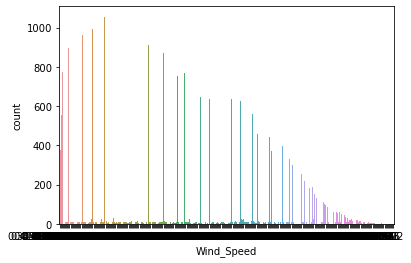

In [6]:
import seaborn as sns
sns.countplot(x = "Wind_Speed", data = df)

In [112]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [113]:
Y

0        0.453704
1        0.453704
2        0.453704
3        0.453704
4        0.453704
           ...   
21115    2.800000
21116    2.400000
21117    0.000000
21118    1.800000
21119    3.000000
Name: Wind_Speed, Length: 21120, dtype: float64

In [114]:
X

,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Cloud_Coverage,Bright_Sunshine,X_COR,Y_COR,LATITUDE,LONGITUDE,Period
0,29.4,12.3,0.0,68.0,0.6,7.831915,536809.8,510151.9,22.70,90.36,1949.01
1,30.0,14.1,0.0,77.0,0.8,7.831915,536809.8,510151.9,22.70,90.36,1950.01
2,28.2,12.3,0.0,77.0,0.6,7.831915,536809.8,510151.9,22.70,90.36,1951.01
3,26.6,12.3,2.0,77.0,1.0,7.831915,536809.8,510151.9,22.70,90.36,1952.01
4,30.0,13.3,10.0,75.0,1.6,7.831915,536809.8,510151.9,22.70,90.36,1953.01
...,...,...,...,...,...,...,...,...,...,...,...
21115,30.3,16.5,0.0,72.0,0.9,8.700000,734765.4,308914.1,20.87,92.26,2009.12
21116,31.7,16.7,193.0,79.0,1.4,5.500000,734765.4,308914.1,20.87,92.26,2010.12
21117,31.5,16.4,0.0,73.0,1.5,7.400000,734765.4,308914.1,20.87,92.26,2011.12
21118,30.0,15.8,0.0,70.0,0.2,9.000000,734765.4,308914.1,20.87,92.26,2012.12


In [96]:
# MinMaxScaler
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0,1))
# X = sc.fit_transform(X)
# X

array([[0.34821429, 0.27853881, 0.        , ..., 0.375     , 0.48648649,
        0.01535862],
       [0.375     , 0.36073059, 0.        , ..., 0.375     , 0.48648649,
        0.03071725],
       [0.29464286, 0.27853881, 0.        , ..., 0.375     , 0.48648649,
        0.04607587],
       ...,
       [0.44196429, 0.46575342, 0.        , ..., 0.        , 1.        ,
        0.96928275],
       [0.375     , 0.43835616, 0.        , ..., 0.        , 1.        ,
        0.98464138],
       [0.37053571, 0.47031963, 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [51]:
# Level Envoding
# from sklearn.preprocessing import LabelEncoder
# le6 = LabelEncoder()
# Y = le6.fit_transform(Y)
# Y = Y.reshape(-1,1)
# Y

array([[ 11],
       [ 11],
       [ 11],
       ...,
       [  0],
       [176],
       [233]], dtype=int64)

In [56]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range=(0,1))
# Y = sc.fit_transform(Y)
# Y

array([[0.03606557],
       [0.03606557],
       [0.03606557],
       ...,
       [0.        ],
       [0.57704918],
       [0.76393443]])

In [115]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2)

In [116]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [117]:
trainX_scaled

array([[ 0.23525832,  0.87493699,  3.62486924, ..., -0.56406151,
        -0.07942655,  1.03923318],
       [-0.26656146,  0.87493699,  2.6746261 , ..., -0.9148783 ,
         0.60583709,  1.03809944],
       [-1.8389301 , -1.70566194, -0.78876007, ...,  1.19002248,
        -0.03492891,  0.46782732],
       ...,
       [-0.26656146,  0.59268398, -0.3011353 , ..., -0.47849643,
        -0.77358971, -0.71749972],
       [ 0.33562228,  0.73381048,  1.34511926, ...,  0.79642314,
         1.13980876, -1.90962922],
       [-0.90219984, -1.86694937, -0.8179342 , ...,  0.79642314,
         1.13980876,  1.09762088]])

In [118]:
# MLPRegressor

from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(trainX_scaled, trainY)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [119]:
y_pred = mlp_reg.predict(testX_scaled)
df_temp = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
14280,0.9,0.457350
10449,5.4,1.590727
7214,1.7,1.202948
3497,0.4,1.097527
5022,2.8,3.129338


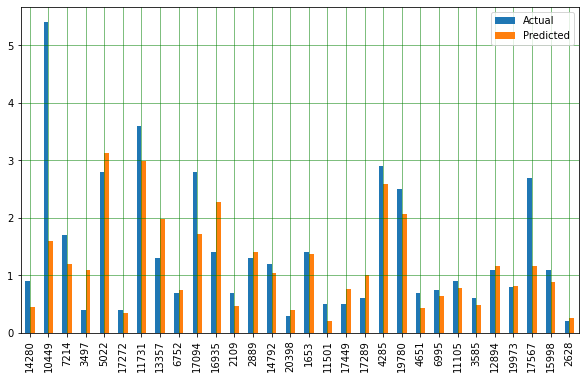

In [120]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

Text(0, 0.5, 'Cost')

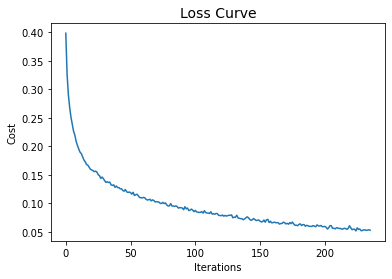

In [121]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [123]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, y_pred)))

Mean Absolute Error: 0.37510293867963496
Mean Squared Error: 0.2934900369643247
Root Mean Squared Error: 0.5417472076202374


In [124]:
from sklearn.metrics import r2_score
score= r2_score(testY,y_pred)
score

0.7175073717245151

In [125]:
# Hyper Parameter Tuning
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [126]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(trainX_scaled, trainY)

print(grid.best_params_) 

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [127]:
grid_predictions = grid.predict(testX_scaled) 
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

,Actual,Predicted
14280,0.9,0.771414
10449,5.4,3.131550
7214,1.7,1.403288
3497,0.4,1.107987
5022,2.8,2.696282


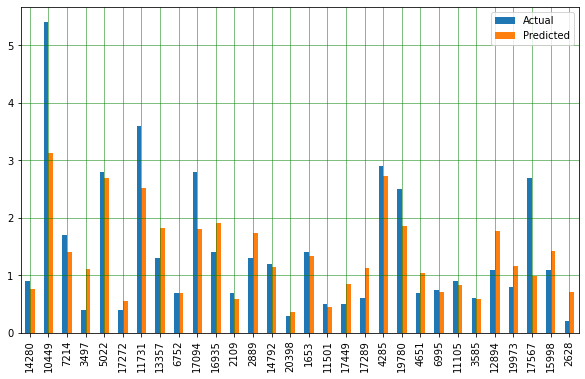

In [128]:
df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

In [129]:
from sklearn.metrics import r2_score
score= r2_score(testY,grid_predictions)
score

0.773575397126461

In [130]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, grid_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(testY, grid_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, grid_predictions)))

Mean Absolute Error: 0.3420944807413353
Mean Squared Error: 0.2352392891547691
Root Mean Squared Error: 0.4850147308636812
